# Regularized data programming: Low data regime experiments

`Spouse` dataset.

## Preamble

In [1]:
# Importations.
import torch
import numpy as np
import sys
import seaborn as sns
import matplotlib
import pandas as pd
import sklearn

# Personal scripts.
from ratner_mle import RatnerMLE
from bayesian_dp import BayesianDP
from utils import Utils
from train_test import Trainer

# View versioning.
print("python version:", sys.version)
print("\ntorch version:", torch.__version__)
print("numpy version:", np.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("sklearn version:", sklearn.__version__)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


python version: 3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]

torch version: 1.11.0
numpy version: 1.22.2
seaborn version: 0.11.2
matplotlib version: 3.5.1
pandas version: 1.4.1
sklearn version: 1.0.2


## Read data

In [2]:
# Read in labeling function matrix files.
df_train = pd.read_csv("../data/Spouse/spouse_lf_matrix_train.csv")
df_val = pd.read_csv("../data/Spouse/spouse_lf_matrix_val.csv")
df_test = pd.read_csv("../data/Spouse/spouse_lf_matrix_test.csv")

# Explore.
print("\n---------------------------")
print("TRAINING DATA:")
print("---------------------------\n")
print(df_train.info())
display(df_train)

print("---------------------------")
print("VALIDATION DATA:")
print("---------------------------\n")
print(df_val.info())
display(df_val)

print("---------------------------")
print("TEST DATA:")
print("---------------------------\n")
print(df_test.info())
display(df_test)


---------------------------
TRAINING DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        3858 non-null   int64
 1   1        3858 non-null   int64
 2   2        3858 non-null   int64
 3   3        3858 non-null   int64
 4   Label    3858 non-null   int64
 5   Snorkel  3858 non-null   int64
dtypes: int64(6)
memory usage: 181.0 KB
None


,0,1,2,3,Label,Snorkel
0,0,0,0,0,-1,0
1,0,0,0,0,-1,0
2,0,0,-1,0,-1,-1
3,0,0,0,0,-1,0
4,0,0,0,0,-1,0
...,...,...,...,...,...,...
3853,0,0,-1,0,-1,-1
3854,0,0,0,0,-1,0
3855,0,0,0,0,-1,0
3856,0,0,0,0,-1,0


---------------------------
VALIDATION DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        553 non-null    int64
 1   1        553 non-null    int64
 2   2        553 non-null    int64
 3   3        553 non-null    int64
 4   Label    553 non-null    int64
 5   Snorkel  553 non-null    int64
dtypes: int64(6)
memory usage: 26.0 KB
None


,0,1,2,3,Label,Snorkel
0,0,0,0,0,-1,0
1,0,0,0,0,-1,0
2,0,0,0,0,-1,0
3,0,0,0,0,-1,0
4,0,0,0,0,-1,0
...,...,...,...,...,...,...
548,0,0,0,0,-1,0
549,1,1,0,0,-1,1
550,0,0,0,0,-1,0
551,0,0,0,0,-1,0


---------------------------
TEST DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        1101 non-null   int64
 1   1        1101 non-null   int64
 2   2        1101 non-null   int64
 3   3        1101 non-null   int64
 4   Label    1101 non-null   int64
 5   Snorkel  1101 non-null   int64
dtypes: int64(6)
memory usage: 51.7 KB
None


,0,1,2,3,Label,Snorkel
0,0,0,0,0,1,0
1,0,0,0,0,-1,0
2,0,0,-1,-1,-1,-1
3,0,0,0,0,-1,0
4,0,0,0,0,-1,0
...,...,...,...,...,...,...
1096,0,0,0,0,-1,0
1097,0,0,0,0,-1,0
1098,0,0,0,0,-1,0
1099,0,0,0,0,-1,0


In [3]:
# Read in raw text data.
df_train_raw = pd.read_csv("../data/Spouse/spouse_train.csv")
df_val_raw = pd.read_csv("../data/Spouse/spouse_val.csv")
df_test_raw = pd.read_csv("../data/Spouse/spouse_test.csv")

# Explore_raw.
print("\n---------------------------")
print("TRAINING DATA:\n")
print("---------------------------\n")
print(df_train_raw.info())
display(df_train_raw)

print("\n---------------------------")
print("VALIDATION DATA:\n")
print("---------------------------\n")
print(df_val_raw.info())
display(df_val_raw)

print("\n---------------------------")
print("TEST DATA:\n")
print("---------------------------\n")
print(df_test_raw.info())
display(df_test_raw)


---------------------------
TRAINING DATA:

---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   person1_word_idx      3858 non-null   object
 1   person2_word_idx      3858 non-null   object
 2   sentence              3858 non-null   object
 3   tokens                3858 non-null   object
 4   person1_right_tokens  3858 non-null   object
 5   person2_right_tokens  3858 non-null   object
 6   between_tokens        3858 non-null   object
 7   Label                 3858 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 241.2+ KB
None


,person1_word_idx,person2_word_idx,sentence,tokens,person1_right_tokens,person2_right_tokens,between_tokens,Label
0,"(1, 2)","(7, 8)","With Dellen Millard, 30, and Mark Smich, 27, i...","['With', 'Dellen', 'Millard', ',', '30', ',', ...","[',', '30', ',', 'and']","[',', '27', ',', 'in']","[',', '30', ',', 'and']",0
1,"(0, 0)","(9, 10)","John is in Ukraine, where he met President Pet...","['John', 'is', 'in', 'Ukraine', ',', 'where', ...","['is', 'in', 'Ukraine', ',']","['and', 'called', 'for', 'the']","['is', 'in', 'Ukraine', ',', 'where', 'he', 'm...",0
2,"(5, 5)","(68, 68)",1 Serena Williams considers sister Venus 'the ...,"['1', 'Serena', 'Williams', 'considers', 'sist...","['', 'the', 'best', 'player']","['.', '', '*']","['', 'the', 'best', 'player', 'in', 'the', 'to...",0
3,"(12, 13)","(15, 16)","Her rules: Chrissy Teigen, right, posed next t...","['Her', 'rules', ':', 'Chrissy', 'Teigen', ','...","['and', 'Ashley', 'Tisdale', ',']","[',', 'left', ',', 'at']",['and'],0
4,"(44, 44)","(75, 75)",Devoted mum: Katie goes on to insist that she ...,"['Devoted', 'mum', ':', 'Katie', 'goes', 'on',...","['says', 'her', 'hectic', 'schedule']","['quipped', 'back', ':', '']","['says', 'her', 'hectic', 'schedule', 'and', '...",0
...,...,...,...,...,...,...,...,...
3853,"(3, 6)","(8, 10)",Dance party: Honey Boo Boo's father Mike 'Suga...,"['Dance', 'party', ':', 'Honey', 'Boo', 'Boo',...","['father', '', 'Mike', '']","['Sugar', 'Bear', '', 'Thompson']",['father'],0
3854,"(7, 8)","(14, 15)","Last week, it was reported that Leah Messer wa...","['Last', 'week', ',', 'it', 'was', 'reported',...","['was', 'caught', 'having', 'sex']","[',', 'which', 'is', 'obviously']","['was', 'caught', 'having', 'sex', 'with']",0
3855,"(0, 0)","(41, 42)","SiriusXM also provides premium traffic, weathe...","['SiriusXM', 'also', 'provides', 'premium', 't...","['also', 'provides', 'premium', 'traffic']","[')', ',', 'Sirius', 'Marine']","['also', 'provides', 'premium', 'traffic', ','...",0
3856,"(0, 0)","(7, 8)",Former couple: Nicole was married to Tom Cruis...,"['Former', 'couple', ':', 'Nicole', 'was', 'ma...","['couple', ':', 'Nicole', 'was']","['for', '11-years', '']","['couple', ':', 'Nicole', 'was', 'married', 'to']",0



---------------------------
VALIDATION DATA:

---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   person1_word_idx      553 non-null    object
 1   person2_word_idx      553 non-null    object
 2   sentence              553 non-null    object
 3   tokens                553 non-null    object
 4   person1_right_tokens  553 non-null    object
 5   person2_right_tokens  553 non-null    object
 6   between_tokens        553 non-null    object
 7   Label                 553 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 34.7+ KB
None


,person1_word_idx,person2_word_idx,sentence,tokens,person1_right_tokens,person2_right_tokens,between_tokens,Label
0,"(0, 0)","(14, 14)",Zac said of the Dawson's Creek alum: 'When I f...,"['Zac', 'said', 'of', 'the', 'Dawson', 's', 'C...","['said', 'of', 'the', 'Dawson']","['and', 'her', 'rapport', 'on']","['said', 'of', 'the', 'Dawson', 's', 'Creek', ...",0
1,"(43, 44)","(55, 56)",Fast moving couple: Morena Baccarin's estrange...,"['Fast', 'moving', 'couple', ':', 'Morena', 'B...","['', 'At', 'the', 'centre']","[',', 'pictured', 'in', 'New']","['', 'At', 'the', 'centre', ':', 'Her', 'Gotha...",0
2,"(1, 1)","(12, 12)","Meanwhile Marie and her partner Emi, as well a...","['Meanwhile', 'Marie', 'and', 'her', 'partner'...","['and', 'her', 'partner', 'Emi']","['and', 'Vanessa', 'from', 'Sydney']","['and', 'her', 'partner', 'Emi', ',', 'as', 'w...",0
3,"(0, 0)","(10, 11)","Judi and Wayne Richardson (ME), parents of Dar...","['Judi', 'and', 'Wayne', 'Richardson', '(', 'M...","['and', 'Wayne', 'Richardson', '(']","[',', 'who', 'was', 'shot']","['and', 'Wayne', 'Richardson', '(', 'ME', ')',...",0
4,"(20, 20)","(58, 58)",Expecting: The Hotplate star Marie Yokoyama is...,"['Expecting', ':', 'The', 'Hotplate', 'star', ...","[',', 'pictured', 'with', 'her']","[',', 'who', 'is', 'now']","[',', 'pictured', 'with', 'her', 'work', 'part...",0
...,...,...,...,...,...,...,...,...
548,"(3, 3)","(14, 14)",The character of Bond is thought to be a compo...,"['The', 'character', 'of', 'Bond', 'is', 'thou...","['is', 'thought', 'to', 'be']","['knew', 'when', 'he', 'served']","['is', 'thought', 'to', 'be', 'a', 'composite'...",0
549,"(3, 3)","(11, 11)",Earlier this month Rob posted an update on his...,"['Earlier', 'this', 'month', 'Rob', 'posted', ...","['posted', 'an', 'update', 'on']","[',', 'sharing', 'on', 'September']","['posted', 'an', 'update', 'on', 'his', 'wife'...",0
550,"(1, 1)","(9, 9)",But Katie said she doesn't have time for Kirst...,"['But', 'Katie', 'said', 'she', 'does', ""n't"",...","['said', 'she', 'does', ""n't""]","['s', 'views', '.', '']","['said', 'she', 'does', ""n't"", 'have', 'time',...",0
551,"(276, 276)","(295, 295)",That such allegation is coming at a time nobod...,"['That', 'such', 'allegation', 'is', 'coming',...","['did', 'not', 'see', 'it']","['who', 'comes', 'to', 'office']","['did', 'not', 'see', 'it', 'as', 'a', 'big', ...",0



---------------------------
TEST DATA:

---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   person1_word_idx      1101 non-null   object
 1   person2_word_idx      1101 non-null   object
 2   sentence              1101 non-null   object
 3   tokens                1101 non-null   object
 4   person1_right_tokens  1101 non-null   object
 5   person2_right_tokens  1101 non-null   object
 6   between_tokens        1101 non-null   object
 7   Label                 1101 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 68.9+ KB
None


,person1_word_idx,person2_word_idx,sentence,tokens,person1_right_tokens,person2_right_tokens,between_tokens,Label
0,"(2, 3)","(6, 7)",Coordinated: Sam Burgess and fiancé Phoebe Hoo...,"['Coordinated', ':', 'Sam', 'Burgess', 'and', ...","['and', 'fiancé', 'Phoebe', 'Hooke']","[',', 'who', 'have', 'now']","['and', 'fiancé']",1
1,"(1, 1)","(5, 5)","After Betty's death, Robert filed forms to the...","['After', 'Betty', 's', 'death', ',', 'Robert'...","['s', 'death', ',', 'Robert']","['filed', 'forms', 'to', 'the']","['s', 'death', ',']",0
2,"(23, 24)","(43, 47)","Ceawlin Thynn, 41, said the row resulted in hi...","['Ceawlin', 'Thynn', ',', '41', ',', 'said', '...","[',', '29', '(', 'pictured']","['pictured', 'on', 'the', 'grounds']","[',', '29', '(', 'pictured', 'above', ')', ','...",0
3,"(9, 11)","(24, 24)",Source: News unlimited - 1 day ago Sheena Bor...,"['Source', ':', 'News', 'unlimited', '-', '1',...","['case', ':', '14', 'days']","[',', 'Sept', '07', '(']","['case', ':', '14', 'days', 'judicial', 'custo...",0
4,"(1, 4)","(6, 6)",' Loved-up: Sofía and Joe Manganiello are...,"['', '', 'Loved', '-', 'up', ':', 'Sofía', 'an...","[':', 'Sofía', 'and', 'Joe']","['and', 'Joe', 'Manganiello', '']",[':'],0
...,...,...,...,...,...,...,...,...
1096,"(13, 14)","(40, 40)",The man in her life: The TV icon has been dati...,"['The', 'man', 'in', 'her', 'life', ':', 'The'...","[',', '50', ',', 'for']","[',', 'Banks', 'will', 'be']","[',', '50', ',', 'for', 'two', 'years', ';', '...",0
1097,"(15, 16)","(50, 51)",Kaia and Presley are part of a new generation ...,"['Kaia', 'and', 'Presley', 'are', 'part', 'of'...","['and', 'Kendall', 'Jenner', '']","['.', '']","['and', 'Kendall', 'Jenner', '', 'In', '2012',...",0
1098,"(8, 8)","(20, 22)",The alleged plan never came to fruition as Lab...,"['The', 'alleged', 'plan', 'never', 'came', 't...","['was', 'removed', 'from', 'power']","['email', '.', '']","['was', 'removed', 'from', 'power', 'and', 're...",0
1099,"(16, 16)","(20, 21)",Party time: Meanwhile at the Blackpool Illumin...,"['Party', 'time', ':', '', 'Meanwhile', 'at', ...","[',', 'Jedward', 'and', 'Alexa']","['took', 'to', 'the', 'stage']","[',', 'Jedward', 'and']",0


## Process data

In [4]:
# Spam dataset: Disaggregate labeling function outputs and gold labels.
# Drop third and final LF.
L_train = np.array(df_train.drop(columns = ["Label", "Snorkel"]))

L_val = np.array(df_val.drop(columns = ["Label", "Snorkel"]))
y_val = np.array(df_val["Label"])

L_test = np.array(df_test.drop(columns = ["Label", "Snorkel"]))
y_test = np.array(df_test["Label"])

print("\n***L_train.shape =", L_train.shape)
display(L_train)
print("\n***L_val.shape =", L_val.shape)
display(L_val)
print("\n***L_test.shape =", L_test.shape)
display(L_test)

display(y_val)
display(y_test)


***L_train.shape = (3858, 4)


array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0, -1,  0],
       ...,
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])


***L_val.shape = (553, 4)


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])


***L_test.shape = (1101, 4)


array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0, -1, -1],
       ...,
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

array([ 1, -1, -1, ..., -1, -1, -1])

## Training config

Hyperparameter values were selected through grid search on the validation set.

In [5]:
# Total labeling functions.
M = L_train.shape[1]

# Compute empirical betas for training data.
empirical_coverage = []
for i in range(L_train.shape[1]):
    coverage = np.count_nonzero(L_train[:, i]) / L_train.shape[0]
    empirical_coverage.append(coverage)
print("Empirical coverages =\n", empirical_coverage)

# Macros for present experiments.
EPOCHS = 175
LR_MAP = 0.01
LR_MLE = 0.01
TIE_POLICY = "abstain"
INIT_ALPHA_MAP = [1.0] * M
INIT_ALPHA_MLE = [1.0] * M
INIT_BETA = empirical_coverage
STRENGTH = 10
CLIP_GRADS = 10
OPTIMIZER = torch.optim.SGD
FORCE_ABSTAIN = True

Empirical coverages =
 [0.10523587350959046, 0.0321410057024365, 0.11327112493519959, 0.0383618455158113]


In [6]:
# Instantiate Utils and Trainer objects for utility functions.
utils = Utils()
trainer = Trainer()

In [7]:
print("Total LFs =", M)

Total LFs = 4


## Majority vote scores


---------------------------------------------
tn, fp, fn, tp = [102  65   6  34]
F1             = 0.48920863309352514
Accuracy       = 0.6570048309178744
Precision      = 0.3434343434343434
Recall         = 0.85
ROC AUC        = 0.7303892215568862
Coverage       = 0.1880108991825613
---------------------------------------------



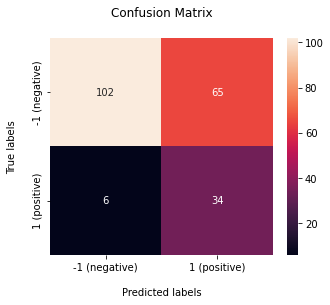

In [8]:
majority_vote = utils.vote_majority(L_test, 
                                    tie_policy = TIE_POLICY)
mv_scores = utils.score(y_test, 
                        majority_vote, 
                        verbose = True, 
                        plot_confusion = True)

## Snorkel scores


---------------------------------------------
tn, fp, fn, tp = [110  67  11  34]
F1             = 0.4657534246575343
Accuracy       = 0.6486486486486487
Precision      = 0.33663366336633666
Recall         = 0.7555555555555555
ROC AUC        = 0.688512241054614
Coverage       = 0.2016348773841962
---------------------------------------------



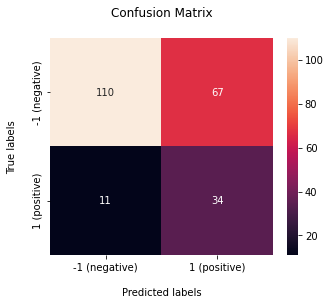

In [9]:
snorkel_scores = utils.score(y_test, 
                             df_test["Snorkel"], 
                             verbose = True, 
                             plot_confusion = True)

Percent training instances retained: 0.1880108991825613
(1101,)
(207,)
(207,)

---------------------------------------------
tn, fp, fn, tp = [102  65   6  34]
F1             = 0.48920863309352514
Accuracy       = 0.6570048309178744
Precision      = 0.3434343434343434
Recall         = 0.85
ROC AUC        = 0.7303892215568862
Coverage       = 1.0
---------------------------------------------



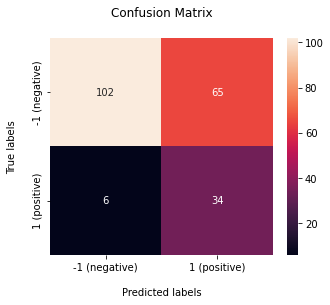

In [10]:
# Snorkel on MV votes.
# Get indices to retain: wherever majority vote did not abstain.
keep_idx = np.where(majority_vote == 0, False, True)
print("Percent training instances retained:", keep_idx.sum() / keep_idx.shape[0])
print(keep_idx[:,0].shape)

# Exclude abstained test set instances.
L_test_vote = df_test["Snorkel"].iloc[keep_idx[:,0]]
y_test_vote = y_test[keep_idx[:,0]]
print(L_test_vote.shape)
print(y_test_vote.shape)

snorkel_scores = utils.score(y_test_vote, 
                             L_test_vote, 
                             verbose = True, 
                             plot_confusion = True)

## Dummy classifier scores

In [10]:
# Identify most abundant class.
df_test.Label.value_counts()

-1    1020
 1      81
Name: Label, dtype: int64


---------------------------------------------
tn, fp, fn, tp = [1020    0   81    0]
F1             = 0.0
Accuracy       = 0.9264305177111717
Precision      = 0.0
Recall         = 0.0
ROC AUC        = 0.5
Coverage       = 1.0
---------------------------------------------



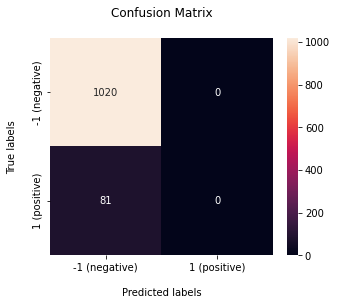

In [11]:
# Dummy classifier: label everything most abundant class.
dummy_scores = utils.score(y_test,
                           np.array([-1] * len(y_test)), 
                           verbose = True, 
                           plot_confusion = True)

## Define priors

### Empirical accuracies

In [12]:
# Parameters of best performing model yet.
# Target mean of Beta distribution.

# Known accuracies of each synthetic LF on the training set.
# NOTE: Demote 100% accuracies to 99.9999%, otherwise model cannot learn.
#empirical_accuracies = [0.399015, 0.467742, 0.154930, 0.337349, 0.967963,
#                        0.939189, 0.925000, 0.714286, 0.300000]
empirical_accuracies = [0.399015, 0.467742, 0.967963, 0.939189]

### Priors from majority vote

In [13]:
# Get priors from majority vote.
priors_mv = utils.get_priors_majority_vote(L_train, remove_zeros = True)
print("\npriors_mv_means =\n", priors_mv)
print("\nempirical accuracies =\n", empirical_accuracies)

l2_mv = np.linalg.norm(np.array(priors_mv) - np.array(empirical_accuracies))
print("\nL2 (priors_mv - empirical_accuracies) =", l2_mv)


# Estimated accuracies via majority vote = [0.9772727272727273, 0.9913793103448276, 0.9894736842105263, 0.986013986013986]

priors_mv_means =
 [0.9772727272727273, 0.9913793103448276, 0.9894736842105263, 0.986013986013986]

empirical accuracies =
 [0.399015, 0.467742, 0.967963, 0.939189]

L2 (priors_mv - empirical_accuracies) = 0.7818141216339087


### Manual priors

In [14]:
# Manually design priors.
priors_manual = [0.6] * M
print("\npriors_manual_means =\n", priors_manual)
print("\nempirical accuracies =\n", empirical_accuracies)

l2_mv = np.linalg.norm(np.array(priors_manual) - np.array(empirical_accuracies))
print("\nL2 (priors_manual - empirical_accuracies) =", l2_mv)


priors_manual_means =
 [0.6, 0.6, 0.6, 0.6]

empirical accuracies =
 [0.399015, 0.467742, 0.967963, 0.939189]

L2 (priors_manual - empirical_accuracies) = 0.5552774944827136


## Explore untrained models

Zero training observations.


Untrained MAP score:

---------------------------------------------
tn, fp, fn, tp = [102  65   6  34]
F1             = 0.48920863309352514
Accuracy       = 0.6570048309178744
Precision      = 0.3434343434343434
Recall         = 0.85
ROC AUC        = 0.7303892215568862
Coverage       = 0.1880108991825613
---------------------------------------------



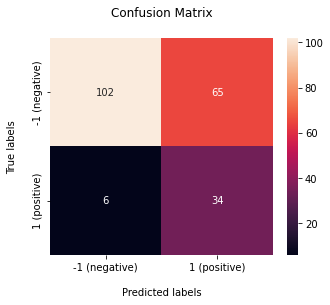

[0.6570048309178744,
 0.48920863309352514,
 0.3434343434343434,
 0.85,
 0.7303892215568862,
 0.1880108991825613]

In [15]:
MAP = BayesianDP(alpha = INIT_ALPHA_MAP,
                 beta = INIT_BETA,
                 priors_alpha = priors_mv,
                 prior_strength = STRENGTH)
pred_map = MAP.predict(L_test, 
                       return_proba = False, 
                       tie_policy = TIE_POLICY)
print("\nUntrained MAP score:")
utils.score(y_test, pred_map)

In [16]:
print("PRIOR PARAMS:")
for prior in MAP.priors_alpha:
    print(prior.concentration1, ",", prior.concentration0)

PRIOR PARAMS:
tensor(1000.) , tensor(23.2558)
tensor(1000.) , tensor(8.6957)
tensor(1000.) , tensor(10.6383)
tensor(1000.) , tensor(14.1844)



Untrained MLE score:

---------------------------------------------
tn, fp, fn, tp = [103  65   6  34]
F1             = 0.48920863309352514
Accuracy       = 0.6586538461538461
Precision      = 0.3434343434343434
Recall         = 0.85
ROC AUC        = 0.7315476190476191
Coverage       = 0.18891916439600362
---------------------------------------------



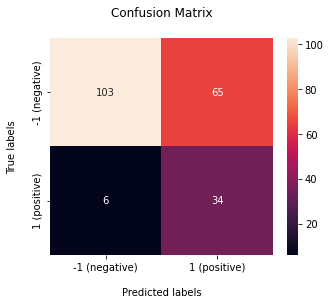

[0.6586538461538461,
 0.48920863309352514,
 0.3434343434343434,
 0.85,
 0.7315476190476191,
 0.18891916439600362]

In [17]:
MLE = RatnerMLE(alpha = INIT_ALPHA_MLE,
                 beta = INIT_BETA)
pred_mle = MLE.predict(L_test, 
                       return_proba = False, 
                       tie_policy = TIE_POLICY)
print("\nUntrained MLE score:")
utils.score(y_test, pred_mle)

## Explore variance under low data

In [27]:
# Loop through different subset sizes.
# Scores = [acc, f1, precision, recall, roc, coverage].
sizes = [1, 5, 10, 50, 100, 500, 1000, 2000, 3000, L_train.shape[0]]
n_iter = 5
epochs_map = EPOCHS
epochs_mle = 35
p_y = 0.5
indices_by_size = dict()
for size in sizes:

    if size == L_train.shape[0]:
        n_iter = 1
    
    map_scores, mle_scores, majority_scores, subset_indices = trainer.loop_train_random_subset(L_train,
                                                                                               L_val,
                                                                                               y_val,
                                                                                               L_test, 
                                                                                               y_test,
                                                                                               INIT_ALPHA_MAP,
                                                                                               INIT_ALPHA_MLE,
                                                                                               INIT_BETA,
                                                                                               prior_strength = STRENGTH,
                                                                                               p_y = p_y,
                                                                                               force_abstain = FORCE_ABSTAIN,
                                                                                               epochs_map = epochs_map,
                                                                                               epochs_mle = epochs_mle,
                                                                                               learning_rate_map = LR_MAP,
                                                                                               learning_rate_mle = LR_MLE,
                                                                                               early_stopping = True,
                                                                                               patience = 5,
                                                                                               clip_grads = CLIP_GRADS,
                                                                                               verbose = False,
                                                                                               n_rows = size, 
                                                                                               n_iter = n_iter)
    # Store indices to rerun experiment if needed.
    indices_by_size[size] = subset_indices
    
    # Run supervised learning model.
    svm_scores = []
    for i in range(n_iter):
        y_train_svm = df_train_raw.iloc[list(subset_indices.get(i))]["Label"]
        # Can only compute if both labels present in training set.
        if np.unique(y_train_svm).shape[0] > 1:
            X_train_svm = df_train_raw.iloc[list(subset_indices.get(i))]["sentence"]
            y_train_svm = np.array(y_train_svm, dtype = int)
            X_test_svm = df_test_raw["sentence"]
            y_test_svm = np.array(df_test_raw["Label"], dtype = int)
            scores = trainer.train_test_score_svm(X_train_svm, 
                                                  X_test_svm, 
                                                  y_train_svm, 
                                                  y_test_svm,
                                                  alpha = 1e-4) # Optimized alpha.
            svm_scores.append(scores)
        else:
            svm_scores.append([0.0] * len(map_scores[0]))
    
    print("\n# -----------------------------------")
    print("# ---- SUBSET SIZE =", size)
    print("# -----------------------------------")
    print("\n# ---- MAP ----") 
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(map_scores, "MAP", size)
    print("\n# ---- MLE ----")
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(mle_scores, "MLE", size)
    print("\n#---- MAJORITY ----")
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(majority_scores, "MAJ", size)
    print("\n#---- SUPPORT VECTOR MACHINE ----")
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(svm_scores, "SVM", size)


# Estimated accuracies via majority vote = [0.999, 0.999, 0.999, 0.999]

--- EARLY STOPPING AT EPOCH 131 OF 175 ---


-- MAP SCORES --


-- MLE SCORES --


-- MAJORITY VOTE SCORES --


# Estimated accuracies via majority vote = [0.999999, 0.999999, 0.999, 0.999]

--- EARLY STOPPING AT EPOCH 145 OF 175 ---


-- MAP SCORES --


-- MLE SCORES --


-- MAJORITY VOTE SCORES --


# Estimated accuracies via majority vote = [0.999, 0.999, 0.999, 0.999]

--- EARLY STOPPING AT EPOCH 131 OF 175 ---


-- MAP SCORES --


-- MLE SCORES --


-- MAJORITY VOTE SCORES --


# Estimated accuracies via majority vote = [0.999, 0.999, 0.999999, 0.999]

--- EARLY STOPPING AT EPOCH 131 OF 175 ---


-- MAP SCORES --


-- MLE SCORES --


-- MAJORITY VOTE SCORES --


# Estimated accuracies via majority vote = [0.999, 0.999, 0.999999, 0.999999]

--- EARLY STOPPING AT EPOCH 146 OF 175 ---


-- MAP SCORES --


-- MLE SCORES --


-- MAJORITY VOTE SCORES --


# -----------------------------------
# ---- SUBSET SIZE = 

### View indices for subsetting

In [28]:
indices_by_size

{1: {0: array([2604]),
  1: array([21]),
  2: array([2468]),
  3: array([605]),
  4: array([3525])},
 5: {0: array([2276, 2625,  506, 1569, 3351]),
  1: array([1416,  678,  129, 3506, 3286]),
  2: array([1243, 2046, 3144, 1706,  283]),
  3: array([ 275, 2086,  157, 1269, 2090]),
  4: array([ 800,  186, 1258, 3555,   92])},
 10: {0: array([2146,  745, 2595, 2333, 2908,  636, 3161, 1695, 3800, 3340]),
  1: array([3203, 1827, 2190,  938, 3626, 3280, 1967, 3284, 1980, 2138]),
  2: array([3520, 1808,  165, 2272,  198, 3356, 1165, 2080, 2252, 1440]),
  3: array([1358, 3362, 1310, 1962,  183,  769, 1905, 2346, 1919,   92]),
  4: array([2913, 2872, 3323, 3388, 2890,  829, 2624, 2732, 2033, 3487])},
 50: {0: array([3841, 2965, 2100, 2731,  498, 1077, 3438, 2777, 3001, 3280, 2380,
         3671, 1979, 2578, 2011, 3800, 2786, 2865, 3139, 3491, 1276, 1379,
         1719, 2904, 2752, 3281, 1665,  101, 2469,  774,  113, 3071,  620,
         3389, 3533, 1092, 1042, 3460, 3711, 3335,  219,  140, 3201,

#### Export random indices for reproducibility

In [30]:
import pickle
with open('spouse_indices.pkl', 'wb') as f:
    pickle.dump(indices_by_size, f)

## End of document